# Análise de Dados e *Machine Learning* - NHL

<p align="center">
    <img width=550 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/web_hockey_basen_art.jpg?raw=true">
</p>

Muito inspirado por Michael Lewis e seu livro "*Moneyball: The Art of Winning an Unfair Game*" (leitura obrigatória para amantes da area que foi adaptado para o cinema com o título \"O Homem que Mudou o Jogo\", do diretor Bennett Miller) mostrou como a análise de dados aliado a um plano de jogo podem ser uma combinação fantástica. Nos últimos anos os avanços na tecnologia (dispositivos e sensores wearable como pulseiras eletrônicas, coletes, dispositivos GPS e outras tecnologias inteligentes) nos permitiram coletar cada vez mais dados. Entretanto, um monte de dados acumulados não são úteis se você não consegue interpretá-los. Portanto, tão importante quanto coletar dados estatísticos é saber decifrá-los. Com isso, a ciência de dados aplicada aos esportes já é uma realidade porque agora somos capazes de gerar valor através desses dados ajudando assim nas tomadas de decisão.

A análise desses novos dados possibilitou não apenas verificar estatísticas clássicas (vitorias, derrotas, gols feitos, gols sofridos..), mas tambem as estatísticas avançadas que procuram entender as diferentes maneiras com que uma jogada ou jogador pode influenciar uma partida. Com isso os times passaram a ser mais competitivos, sendo capazes de se prepararem  para um adversário ou até mesmo um jogador especifico que querem anular em uma partida. Tudo isso graças ao cruzamento de dados do histórico de desempenho dos atletas.

Outro uso da coleta desses dados está em beneficiar as grandes organizações com dados sociais, onde pode-se encontrar padrões e formar grupos dentro da base de fãs e executar campanhas em grupos-alvo. Conhecendo os fatores que mais atraem os fãs, a gestão das equipes pode se concentrar em melhorar esse aspecto, o que leva a ganhar novos fãs e reter os mais antigos. Os fãs podem ser alimentados com uma quantidade enorme de previsões e possibilidades em tempo real com as estatísticas do seu time ou jogador favorito onde podem comparar a sua performance com os outros jogadores no time rival ou do mesmo time.


A ciencia de dados tenta da sua maneira explorar as mesmas perguntas que os fãs e os treinadores se perguntam: quem eu acho que vai ganhar, e por quê? Quem são os melhores jogadores do mundo neste momento? Que estratégias são melhores, e porquê?.

<p align="center">
    <img width=650 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/player.png?raw=true">
</p>

Mas é bom não confiar cegamente nas estatísticas. Por mais que o esporte americano seja excelente para criar uma base sólida de dados, o fator humano nunca pode ser deixado de lado. As estatísticas podem dizer algo, mas o contexto precisa ser levado em conta. Fatores que ainda não são representados nos dados, como a condição psicológica e o humor dos jogadores, também são chaves importantes na hora de analisar o jogo.


# Importando Bibliotecas


In [1]:
# suprimir avisos
import warnings
warnings.filterwarnings("ignore")

# bibliotecas para analise dos dados
import numpy as np # algebra linear
import pandas as pd # procesamento dos dados
import datetime

# setando opcoes globais do pandas
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# bibliotecas para visualização dos dados
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams["font.family"] = "sans-serif"



# Aquisição dos Dados
Os dados que usaremos nesse projeto foram coletados utilizando a **NHL stats API** e desponibilizados por Martin Ellis na plataforma Kaggle no formato *.csv*. Não são apenas os resultados e as estatísticas dos jogos da NHL, mas também detalhes de jogadas individuais, como chutes, gols e defesas, incluindo data, hora e coordenadas x e y. Ao total são 9 conjuntos de dados que se relacionam como apresentado na tabela abaixo:

<p align="center">
    <img width=900 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/table_relationships.JPG?raw=true">
</p>


# Descrição dos conjuntos de dados:

* **game**: Reúne os registros de cada jogo no conjunto de dados;

* **game_golie_stats**: As estatísticas dos goleiros que participaram dos jogos;
  
* **game_plays**: As jogadas individuais de cada jogo;
    
* **game_plays_player**: Os jogadores envolvidos em uma jogada;
    
* **game_skater_stats**: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time;

* **game_teams_stats**: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe;

* **player_info**: Informações sobre os jogadores;
    
* **team_info**: informação sobre as equipes.

Caso esteja interessado em ver como os dados são coletados, indico o vídeo do [Kevin Sidwar](https://www.youtube.com/watch?v=avp7fvuMT1E&t=214s). Ele é também um dos responsaveis por dar inicio a documentação da NHL stats api

# Importando os conjuntos de dados

In [2]:
# nhl_eda
nhl_eda = pd.read_csv('datasets/nhl_eda_cleaned.csv', index_col='game_id')

# game_golie_stats
golie_stats = pd.read_csv('datasets/game_goalie_stats_cleaned.csv')

# game_skater_stats
skater_stats = pd.read_csv('datasets/game_skater_cleaned.csv')

# stanley cup champions
sc_champs = pd.read_csv("datasets/sc_champs.csv")

# plays
#plays = pd.read_csv('nhl_datasets/plays_cleaned.csv', chunksize=5000)


como passamos o parametro chunksize quando importando o conjunto `plays` precisamos unir os blocos criados.

In [3]:
# lista que vai armazenar os blocos
#chunk_list = []  
# iterar sobre os blocos
#for chunk in plays:
    # armazenando os blocos
    #chunk_list.append(chunk)

# concatenando os blocos
#plays = pd.concat(chunk_list)

Para facilitar nosso entendimento, vamos trabalhar cada categoria de dados que temos separadamente. Elas são:
* Estatísticas dos times da NHL. -`nhl_eda`
* Estatísticas dos jogadores de todas as equipes.-`golie_stats` e `skater_stats`
* Estatísticas dos eventos os jogos.-`plays`

# Analise Exploratoria dos Dados
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto de ciência de dados. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações, padrões e lançar hipóteses. Assim, gerando insights que auxiliam na criação de modelos de Machine Learning. 

**Levantamento de hipóteses**
* Quantos jogos no total tivemos por temporada? Quantos deles reprentam a temporada regular e os playoffs?
* Qual time possui o maior número de jogos e o melhor aproveitamento?
* O time que teve o melhor desempenho na temporada regular foi o campeão? Os playoffs e de fato uma outra competição?
* Time mandantes jogam melhor em casa?
* Qual foi o maior numero de gols feito por um time em uma partida?
* Qual a media de gols por time?
* Como está desempenho do ataque e defesa dos times nas temporadas?
* Qual time acumula mais Hits e PIMs?
* O jogo ficou mais fisico (mais hits) durante os anos (season) ouve aumento nas penalidades?
* Os times com maior numero de hits e pim como foi o desempenho atraves das temporadas
* Quais variáveis mais influenciam para a vitoria.




## Conhecendo o conjunto de dados
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

### Qual o tamanho do conjunto de dados? (Quantas observações e features)



In [4]:
# Dimensao do conjunto de dados nhl_eda
print("Dimensão do conjunto de dados:")
print(f"Observações: {nhl_eda.shape[0]}")
print(f"Variáveis:   {nhl_eda.shape[1]}")

Dimensão do conjunto de dados:
Observações: 22868
Variáveis:   18


In [5]:
# primeiras entradas
nhl_eda.head()

,season,type,date_time,team_name,goals_for,goals_against,HoA,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
game_id,,,,,,,,,,,,,,,,,,
2011030221,20112012,P,2012-04-29,Devils,3,4,away,OT,Peter DeBoer,26,31,12,3,1,44.9,6,7,L
2011030221,20112012,P,2012-04-29,Flyers,4,3,home,OT,Peter Laviolette,36,27,6,6,1,55.1,13,4,W
2011030222,20112012,P,2012-05-01,Devils,4,1,away,REG,Peter DeBoer,35,32,12,4,0,50.9,8,7,W
2011030222,20112012,P,2012-05-01,Flyers,1,4,home,REG,Peter Laviolette,20,24,32,5,0,49.1,9,6,L
2011030223,20112012,P,2012-05-03,Flyers,3,4,away,OT,Peter Laviolette,28,28,4,5,1,50.8,2,1,L


Descrição das variáveis:
* `game_id` - Número identificador da partida.
* `season` - Temporada em que ocorreu o jogo
* `type` - Indica se os jogos aconteceram na temporada regular (R) ou playoffs (P)
* `date_time` - Data que ocorreu a partida
* `team_name` - Nome do time
* `goals_for` - Número de gols a favor
* `goals_against` - Número de gols contra
* `HoA` - Indica se o time jogou como mandante (*home*) ou visitante (*away*)
* `settled_in` - Indica como o jogo foi resolvido: tempo regular (REG), overtime (OT) ou shootout (SO)
* `head_coach` - Nome do técnico  
* `shots` - Número de shots dado pelo time na partida
* `hits` - Número de hits dado pelo time na partida
* `pim` - Minutos de penalização atribuídos ao jogador.
* `powerPlayOpportunities` - Contabiliza o número de oportunidades no *power plays*
* `powerPlayGoals` - Número de gols no *power plays*
* `faceOffWinPercentage` - Porcentagem de vitória no faceoff
* `giveaways` - Contabiliza o erro que faz com que um jogador com posse do disco o perca para um jogador do time adversário.
* `takeways` - Contabiliza a ação forçada tomada por um jogador defensivo para recuperar a posse do disco para sua equipe
* `outcome` - Resultado da partida: L (derrotado) e W (vitorioso)

### Quais são os tipos de dados das minhas features? (Numéricos, categóricos)
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [6]:
# tipos dos dados
nhl_eda.dtypes.to_frame(name="tipo_da_var")

,tipo_da_var
season,int64
type,object
date_time,object
team_name,object
goals_for,int64
goals_against,int64
HoA,object
settled_in,object
head_coach,object
shots,int64


Em relação aos tipos dos nossos dados nossas variáveis estão bem representadas. A única variável que alteraremos o tipo e a `date_time` que foi lida como *object* e vamos transformá-la no tipo *datetime*. Isso abre a possibilidade de trabalharmos com séries temporais. Esse procedimento foi feito na etapa de limpeza dos dados, mas por algum motivo o pandas leu essa nossa variável de forma equivocada.

In [7]:
# realizando a mudanca do tipo da variavel
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')
    print("Conversão realizada com sucesso…")

Conversão realizada com sucesso…


Verificando novo tipo da variável.

In [8]:
nhl_eda.dtypes.to_frame(name='tipo_da_var')

,tipo_da_var
season,int64
type,object
date_time,datetime64[ns]
team_name,object
goals_for,int64
goals_against,int64
HoA,object
settled_in,object
head_coach,object
shots,int64


Perfeito, vamos continuar.

### Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises.

In [9]:
# verificando valores ausentes
nhl_eda.isna().sum()

season                    0
type                      0
date_time                 0
team_name                 0
goals_for                 0
goals_against             0
HoA                       0
settled_in                0
head_coach                0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
outcome                   0
dtype: int64

Podemos ver que temos um conjunto de dados bem limpo.


### Estatística descritiva  dos dados
Como o nome sugere, ajudam a descrever e compreender os conjuntos de dados, apresentando-os de uma maneira mais significativa, o que permite uma interpretação mais simples dos dados. Aqui vamos ter as medidas de tendências centrais e de variabilidade.
As medidas de tendências centrais representa o ponto central ou valor típico de um conjunto de dados (**media, mediana e a moda**). Já as medidas de variabilidade representa a quantidade de dispersão num conjunto de dados, ou seja, definem a distância a que os pontos de dados tendem a cair do centro (**variância, desvio padrão, intervalo interquartil..**)

No pandas podemos usar a função *describe()* onde imediatamente obtemos um resumo contendo algumas das principais informações estatísticas relevantes:

* count – quantidade de entradas válidas
* mean – média dos valores
* std – desvio padrão
* min – menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max – maior valor da coluna

Ainda é possível identificar colunas com possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)



In [10]:
# resumo estatistico
nhl_eda.describe()

,season,goals_for,goals_against,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
count,2.286800e+04,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000
mean,2.014315e+07,2.743047,2.794254,30.396405,23.607574,10.175791,3.179334,0.592356,50.000000,8.648155,6.919801
std,2.609836e+04,1.640201,1.641038,6.832590,8.595527,8.038863,1.562107,0.759193,7.203451,4.861654,3.840531
min,2.010201e+07,0.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,20.800000,0.000000,0.000000
25%,2.012201e+07,2.000000,2.000000,26.000000,17.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000
50%,2.014202e+07,3.000000,3.000000,30.000000,23.000000,8.000000,3.000000,0.000000,50.000000,8.000000,6.000000
75%,2.016202e+07,4.000000,4.000000,35.000000,29.000000,12.000000,4.000000,1.000000,54.800000,12.000000,9.000000
max,2.018202e+07,10.000000,10.000000,64.000000,80.000000,183.000000,12.000000,6.000000,79.200000,36.000000,31.000000


Podemos ver que grande parte das nossas variáveis apresentaram valores discrepantes (*outliers*). Entender a presença desses outliers é importante porque os valores discrepantes distorcem nossa distribuição o que pode influenciar negativamente na performance dos algoritmos de machine learning já que eles assumem uma distribuição normal (gaussiana) nas variáveis de entrada. 

Uma das alternativas e filtrar esses valores discrepantes, mas isso significa a perda de informação. Portanto, antes de qualquer ação vamos investigá-los e ver o quanto significativos são.

Como o cérebro humano tem dificuldade de processar grandes volumes de dados, uma das melhores abordagens é plotar a distribuição das variáveis. E o histograma e um gráfico que casa muito com o resumo estatístico que apresentamos. Vamos ao gráfico


#### Histogramas

Sao maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Os histogramas agrupam dados em posições e fornecem uma contagem do número de observações em cada posição. A partir da forma das caixas, você pode ter uma ideia rápida de se um atributo é gaussiano, inclinado(skewed) ou mesmo tem uma distribuição exponencial. Também pode ajudar a ver possíveis discrepâncias.

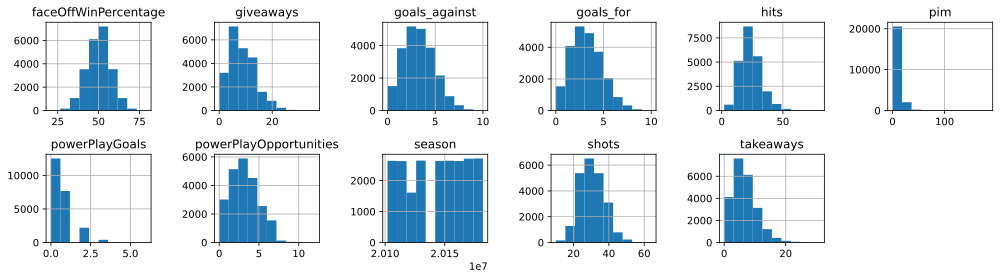

In [11]:
# histograma
nhl_eda.hist(figsize=(14, 4), layout=(2,6))
plt.tight_layout()

* O comportamento exponencial visto nas variáveis `pim`, `powerPlayGoals` mostra a influência dos valores discrepantes distorcendo a distribuição. Na variavel `pim` por exemplo temos uma media de 10 min e um valor maximo de 183 minutos. Mais a frente iremos investigar para analisar tal valor.
* As variavel `season` apresentou um comportamento uniforme com uma queda bastante brusca. Vamos investigar para tentar responder tao comportamento.
* As outras variáveis apesar de apresentarem valores discrepantes como foi visto no resumo estatístico aparentemente não sofreu tanta influência do mesmo uma vez que a distribuição lembra bastante a normal (gaussiana).




### Quantos jogos no total tivemos por temporada? Quantos deles reprentam a temporada regular e os playoffs?

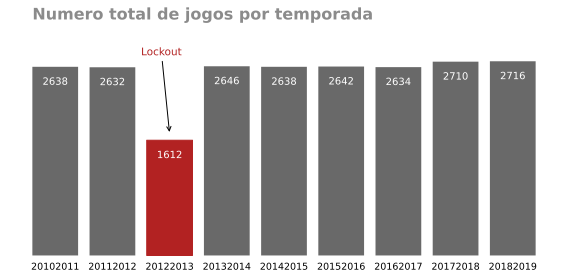

In [12]:
# numero de jogos por temporada
num_jogos_season = nhl_eda['season'].value_counts()

# cria a lista com a temporadas
season_list = list(nhl_eda["season"].sort_values().unique())

x = np.arange(len(season_list))
width_bar = 0.35

# gerando grafico
fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x, num_jogos_season.sort_index(), label=season_list, color='dimgray')

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(rects1)

# titulo
plt.text(-0.4, 3300, "Numero total de jogos por temporada", fontsize=16, weight="bold", alpha=0.45)

ax.set_xticks(x)
ax.set_xticklabels(season_list, fontsize=9.5)


# estilizando imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#  remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,
    left=False,
    labelbottom=True) 

ax.annotate('Lockout',fontsize=10.5, xy=(2, 1700), color="firebrick", xytext=(1.5, 2800),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

        
ax.patches[2].set_color('firebrick')
plt.tight_layout()

A distorção que vimos na distribuição da variável `season` quando apresentando o histograma mostra que na temporada de 2012-2013 foi menor que as demais. O motivo foi o chamado *lockout*  que é quando os empregadores deixam de oferecer as condições necessárias para seus empregados trabalharem, visando mudanças em algum acordo coletivo. Na temporada em questão a fase regular teve apenas 48 jogos. Para ler mais acesse [NHeLas](http://nhelas.com/o-que-e-um-lockout-e-como-funciona/).


### Qual a porcentagem de jogos reprentam a temporada regular e os playoffs?
A liga nacional de hoquei (NHL) e dividida em duas fase a temporada Regular e os Playoffs. Queremos saber qual a sua representividade no conjunto de dados

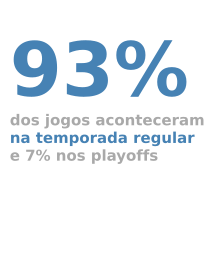

In [13]:
# porcentagemd e jogos regular e playofs
games_reg_pla = nhl_eda["type"].value_counts()
    

fig, ax = plt.subplots(figsize=(2, 4))

# inserindo textos
plt.text(0.50, 5,
        "dos jogos aconteceram",
        #verticalalignment="top",
        fontsize=15,
         weight="bold",
        color="darkgrey")
plt.text(0.50, 4.40,
        "na temporada regular",
        #verticalalignment="top",
        fontsize=15,
         weight="bold",
        color="steelblue")
plt.text(0.50, 3.80,
        "e 7% nos playoffs",
        #verticalalignment="top",
        fontsize=15,
         weight="bold",
        color="darkgrey")


# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

#  remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,
    left=False,
    labelbottom=True) 


# estilizando plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.patches[0].set_color('navy')

ax.annotate('93%',fontsize=75, xy=(0, 8.85),
            xytext=(0.5, 6), weight="bold",
            color="steelblue")
#ax.annotate('7%',fontsize=25, xy=(-0.5, 1700), xytext=(0.91, 2000), color="Black")


ax.set_xlim(0, 6)
ax.set_ylim(0, 9)
plt.tight_layout()

Tivemos um resultado bastante desbalanceado. Essa grande diferença se deve ao formato da própria liga, onde na temporada regular temos 82 jogos e nos playoffs de 28 a 16 jogos. 


### Qual time possui o maior número de jogos ?
Hora de verificar quais os times que mais jogaram na **NHL** (2010-2011 ~ 2018-2019). Nosso resultado vai apresentar a quantidade desses jogos na temporada regular os playoffs e a soma total. Depois vamos verificar quem possui os melhores aproveitamentos


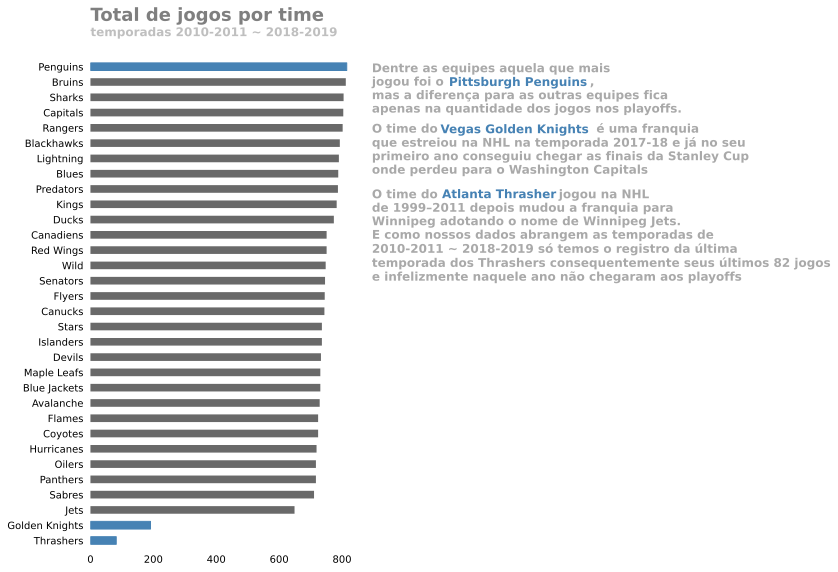

In [14]:
# criando df com jogos por time
# filtrando por temporada regular
games_teams = nhl_eda[nhl_eda['type']=="R"]['team_name'].value_counts().to_frame(name="regular")
# add coluna com numero de jogos nos playofss
games_teams['playoffs'] = nhl_eda[nhl_eda['type']=="P"]['team_name'].value_counts()
# preenchendo valores nulo com 0
games_teams = games_teams.fillna(0)
# add coluna com total de jogos
games_teams['total_jogos'] = games_teams['regular'] + games_teams['playoffs']
# mudando tipo para int
for column in [["playoffs","total_jogos"]]:
    games_teams[column] = games_teams[column].astype("int64")

#print("Os 10 times que mais jogaram foram:\n")
#print(games_teams.sort_values(by="total_jogos", ascending=False).head(10).to_string())


# gerando grafico
fig, ax = plt.subplots(figsize=(12, 8))
games_teams["total_jogos"].sort_values().plot(kind='barh', color="dimgrey", ax=ax)
plt.text(0, 34, "Total de jogos por time", fontsize=18, weight="bold", color="black", alpha=0.5)
plt.text(0, 33, "temporadas 2010-2011 ~ 2018-2019", fontsize=12, weight="bold", color="black", alpha=0.25)

# PENGUINS
plt.text(895, 28,
        "Dentre as equipes aquela que mais\n"
         "jogou foi o                                   ,\n"
         "mas a diferença para as outras equipes fica\n"
         "apenas na quantidade dos jogos nos playoffs."
         ,
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="darkgrey")

plt.text(1140, 29.74,
        "Pittsburgh Penguins",
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="steelblue")

# VEGAS
plt.text(895, 24,
         "O time do                                      é uma franquia\n"
         "que estreiou na NHL na temporada 2017-18 e já no seu\n"
         "primeiro ano conseguiu chegar as finais da Stanley Cup\n"
         "onde perdeu para o Washington Capitals"
         ,
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="darkgrey")

plt.text(1113, 26.65,
        "Vegas Golden Knights",
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="steelblue")

# THRASHER
plt.text(895, 17,
        "O time do                             jogou na NHL\n"
         "de 1999–2011 depois mudou a franquia para\n"
         "Winnipeg adotando o nome de Winnipeg Jets.\n"
         "E como nossos dados abrangem as temporadas de\n"
         "2010-2011 ~ 2018-2019 só temos o registro da última\n"
         "temporada dos Thrashers consequentemente seus últimos 82 jogos\n"
         "e infelizmente naquele ano não chegaram aos playoffs"
         ,
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="darkgrey")

plt.text(1118, 22.4,
        "Atlanta Thrasher",
        #verticalalignment="top",
        fontsize=12,
         weight="bold",
        color="steelblue")

#  remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,
    left=False,
    labelbottom=True) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.patches[31].set_color("steelblue")
ax.patches[1].set_color("steelblue")
ax.patches[0].set_color("steelblue")
#ax.annotate('Regular   x   Playoffs',fontsize=10, xy=(704, 10),
            #xytext=(639, 32), weight="bold",
            #color="black", alpha=0.5)

# removendo legenda
#ax.get_legend().remove()

plt.tight_layout()


Dentre as equipes aquela que mais jogou foi o time do ***Pittsburgh Penguins***, mas a diferença para as outras equipes fica apenas na quantidade dos jogos nos playoffs. Uma vez que na temporada regular temos 82 jogos fixos.

Outro ponto interessante que vale apena ser ressaltado e o do time do ***Atlanta Thrasher*** que jogou na NHL entre os periodos de 1999–2011 depois mudou a franquia para Winnipeg adotando o nome de ***Winnipeg Jets***. E como nossos dados abrangem as temporadas de 2010-2011 ~ 2018-2019 só temos o registro da última temporada dos Thrashers consequentemente seus últimos 82 jogos e infelizmente naquele ano não chegaram aos playoffs. Isso explica também o motivo do time de *Winnipeg* apresentar poucos jogos.

No caso do ***Vegas Golden Knights*** temos uma franquia que estreiou na NHL na temporada 2017-18 e ja no seu primeiro ano conseguiu chegar as finais da *Stanley Cup* onde perdeu para o *Washington Capitals*. Ao total o time acumula 191 jogos sendo 164 na temporada regular e 27 nos playoffs.



## Qual foi o desempenho das equipes?

Agora que ja sabemos quantos jogos cada equipe teve e hora que analisar os desempenhos. 

Vale ressaltar que comparar o desempenho das equipes nos playoffs entre elas fica dificil. Isso porque, apesar de ter quase 10 anos de dados sendo analisados, existe uma diferença enorme entre quantidade de jogos referente a temporada regular e os playoffs. Isso acaba sendo uma influencia enorme porque temos times com mais de 100 jogos nos *playoffs* enquanto outros com apenas 7 jogos, logo não temos uma leitura totalmente verdadeira o que acabada sendo uma comparação desleal. 


In [15]:
# criando df com vitorias temporada regular
teams_win_rate = nhl_eda[(nhl_eda['outcome']=='W') & (nhl_eda['type']=='R')]['team_name'].value_counts().to_frame(name="wins_regular")

# add coluna com taxa de vitoria regular
teams_win_rate['win_rate_regular'] = round(teams_win_rate['wins_regular']/games_teams['regular'], 3)

# add coluna com as vitorias nos playoffs
teams_win_rate['wins_playoffs'] = nhl_eda[(nhl_eda['outcome']=='W') & (nhl_eda['type']=='P')]['team_name'].value_counts()

# preenchendo valores nulos com 0
teams_win_rate = teams_win_rate.fillna(0)

# mudando para o tipo int64
teams_win_rate['wins_playoffs'] = teams_win_rate['wins_playoffs'].astype("int64")

# add coluna com a taxa de vitorias nos playoffs
teams_win_rate['win_rate_playoffs'] = round(teams_win_rate['wins_playoffs']/games_teams['playoffs'], 3)
teams_win_rate = teams_win_rate.sort_values(by='win_rate_regular', ascending=False)

# preenchendo valores nulos com 0
teams_win_rate = teams_win_rate.fillna(0)

teams_win_rate.style.format({'win_rate_regular': "{:.2%}", 'win_rate_playoffs': '{:.2%}'})



,wins_regular,win_rate_regular,wins_playoffs,win_rate_playoffs
Penguins,419,59.50%,59,53.20%
Capitals,408,58.00%,53,53.00%
Golden Knights,94,57.30%,16,59.30%
Bruins,403,57.20%,62,57.40%
Blues,403,57.20%,42,50.00%
Lightning,402,57.10%,47,54.70%
Sharks,390,55.40%,52,51.50%
Ducks,387,55.00%,36,51.40%
Blackhawks,385,54.70%,51,57.30%
Rangers,379,53.80%,47,48.00%


* O time do ***Pittsburgh Penguins*** e aquele apresentou o melhor desempenho na temporada regular caindo um pouco nos playoffs, mas mantendo a taxa de vitorias acima dos 50%.
* O time do ***Vegas Golden Knights*** pode ser considerado um ponto fora da curva. Tem um ótimo aproveitamento na temporada regular 57% e melhor ainda nos playoffs subindo para 59%. Entretanto, o fato de ter poucos jogos em comparação aos outros time nao é algo que possa ser levado em comparação, mas sem dúvidas não tira o merito do time.
* Observando os desempenhos em relação aos *playoffs* é interessante ver como alguns times melhoram e muito seu aproveitamento em relação a temporada regular. Como é o caso dos ***Senators*, *Devils* , *Hurricanes* e *Oilers*** . Entretanto, são times com um baixo aproveitamento na fase regular o que limita as chances de ida aos *playoffs*, mas que podem surpreender quando estão presentes nessa fase.

Vamos ver agora como foi o desempenho dos times comparando o numero de vitorias e derrotas pelas temporadas. 


In [16]:
def team_win_loss(df, team_name):
    """
    Retorna grafico apresentando o desempenho do time atraves das temporadas vitorias e derrotas
    """
    # criando subset
    team_wins = df[(df['team_name']== team_name) & (df['outcome']=='W')].groupby(['season','team_name'])['outcome'].value_counts().to_frame()
    team_defeats = df[(df['team_name']== team_name) & (df['outcome']=='L')].groupby(['season','team_name'])['outcome'].value_counts().to_frame()
    
    # renomendo coluna
    team_wins.rename(columns={'outcome':"num_wins"}, inplace=True)
    team_defeats.rename(columns={'outcome':"num_loss"}, inplace=True)
    
    # resetando index
    team_wins = team_wins.reset_index()
    team_defeats = team_defeats.reset_index()
    
    # gerando grafico
    fig, ax = plt.subplots(figsize=(8, 4))
    team_wins.groupby(['season'])['num_wins'].sum().plot(linewidth=3, color="steelblue", marker='o', label="vitórias", ax=ax)
    team_defeats.groupby(['season'])['num_loss'].sum().plot(linewidth=3, color="gray", marker='o', label="derrotas", ax=ax)

    ax.set_title(team_name + ": vitorias e derrotas por temporada", fontsize=25, loc="left", alpha=0.5, pad=25)

    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()

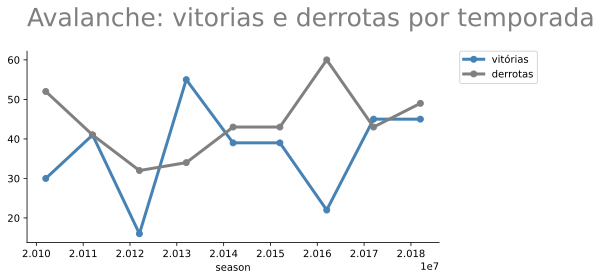

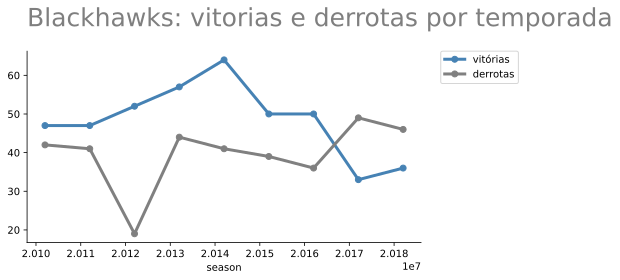

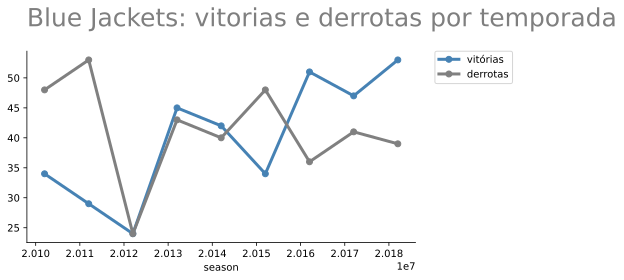

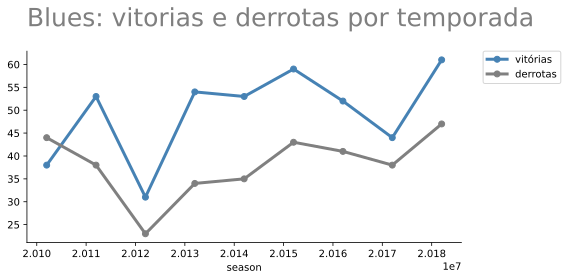

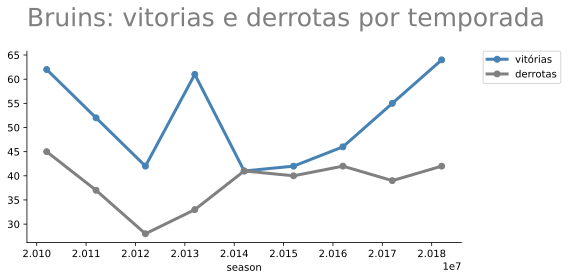

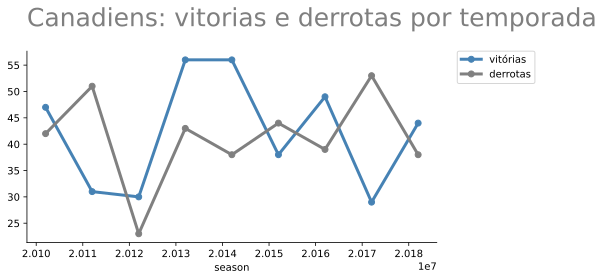

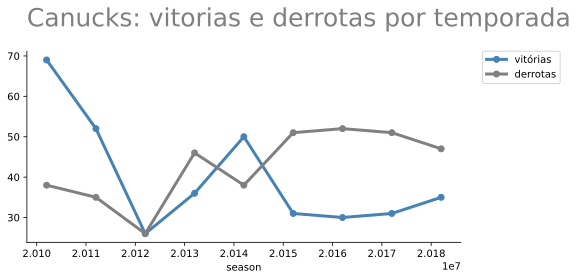

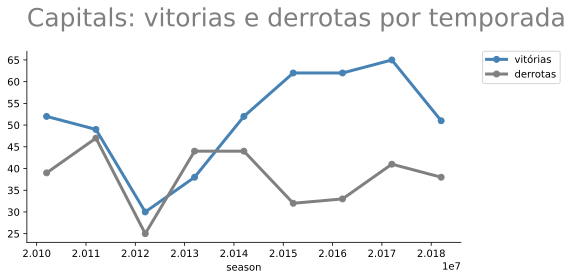

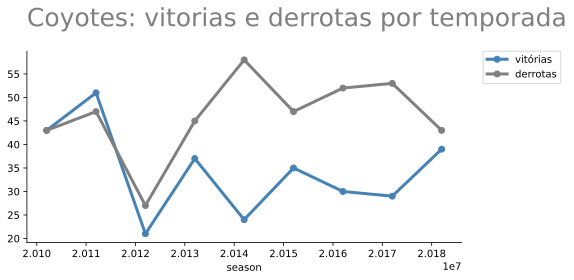

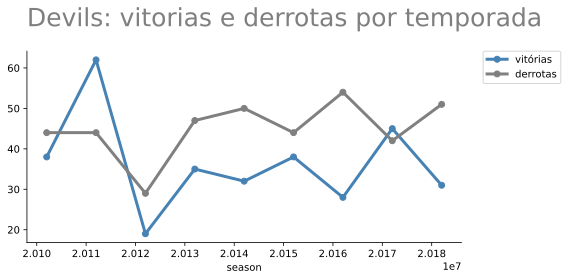

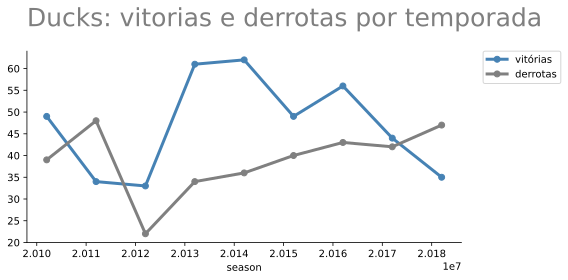

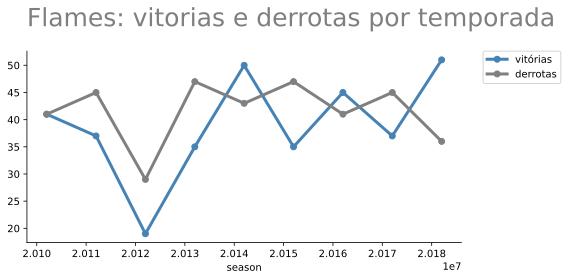

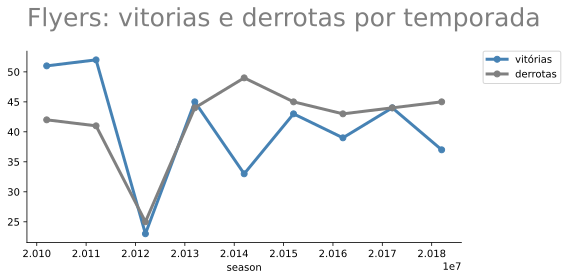

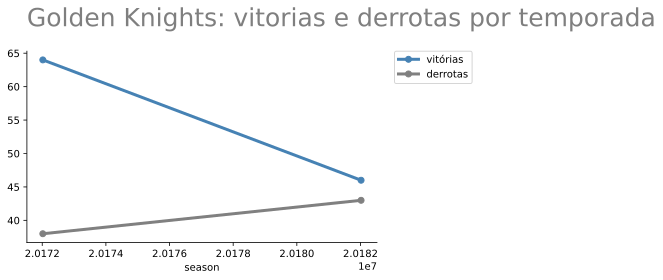

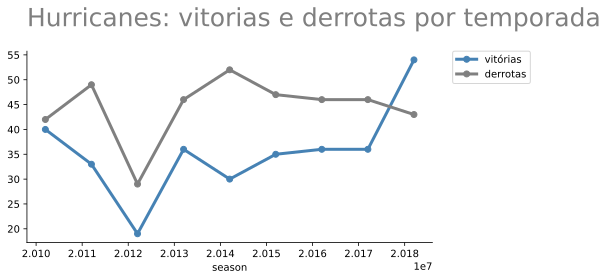

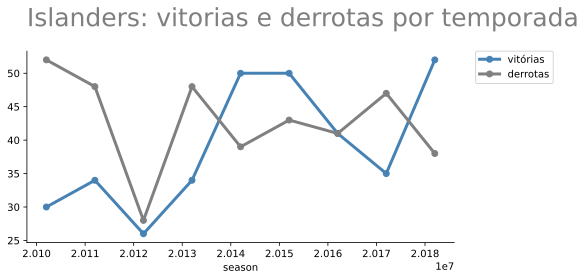

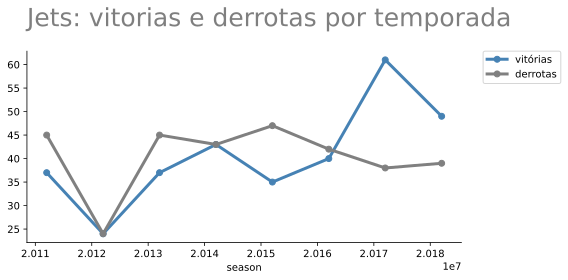

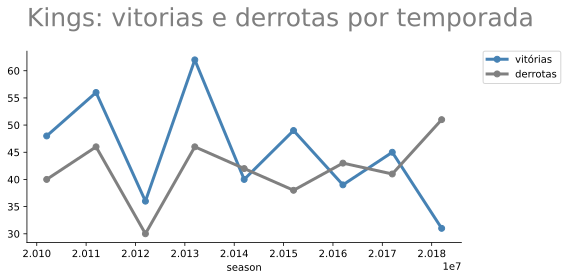

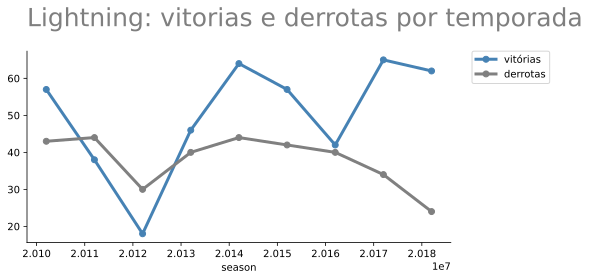

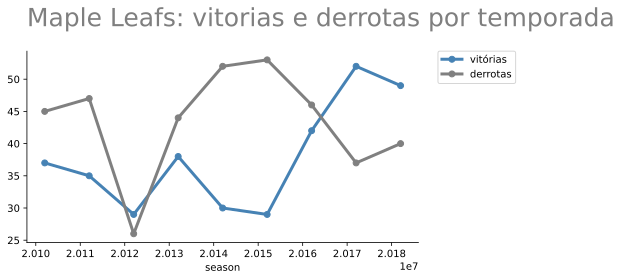

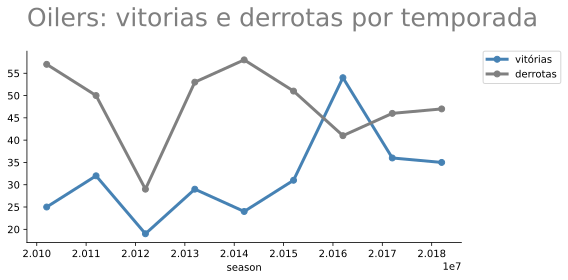

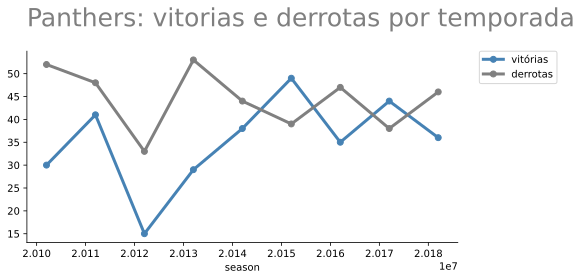

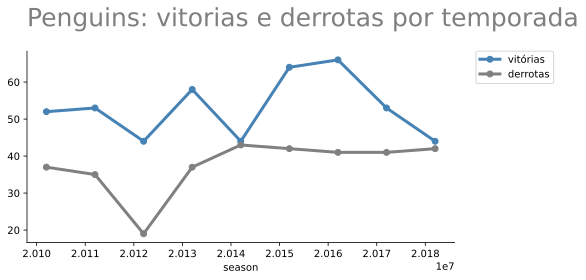

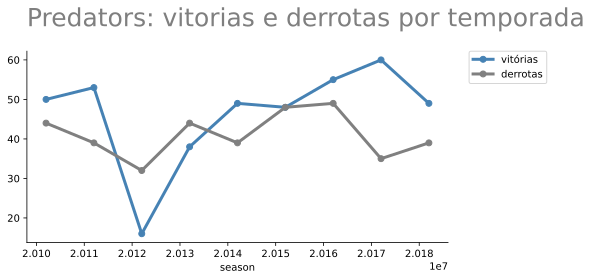

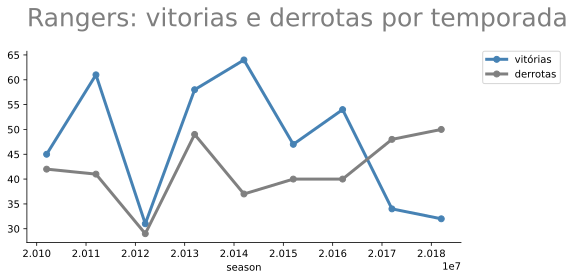

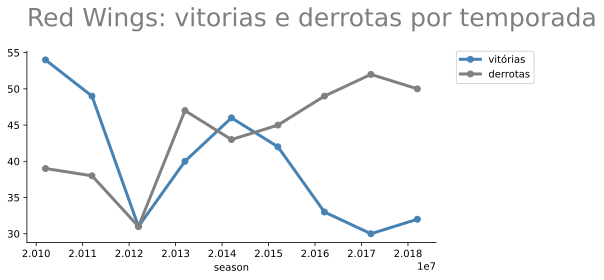

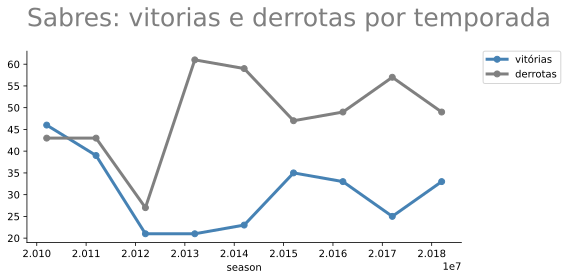

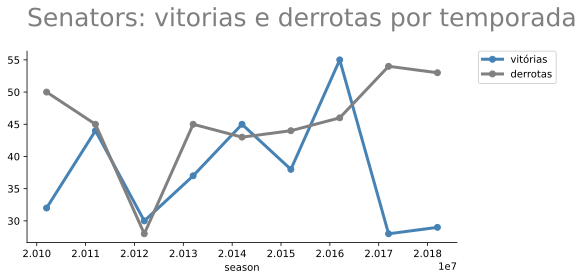

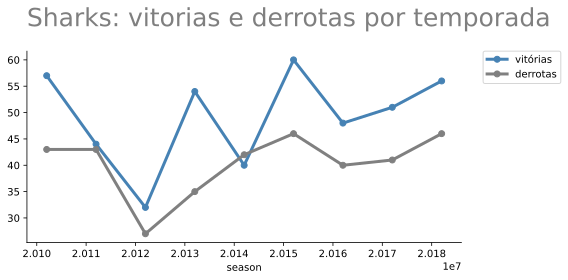

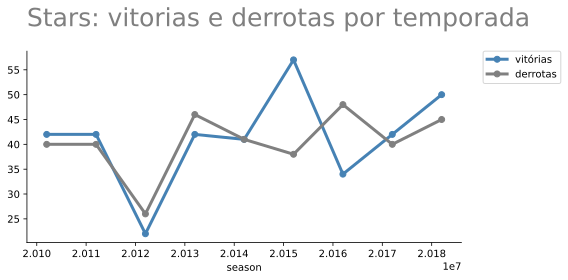

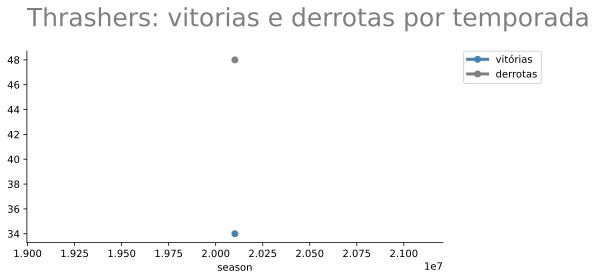

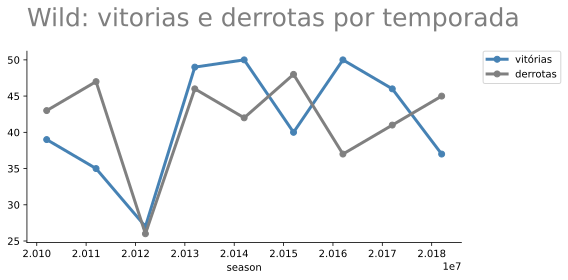

In [17]:
#team_name = input("Select team: ")
for team in list(nhl_eda["team_name"].sort_values().unique()):
    team_win_loss(df=nhl_eda, team_name=team)

É díficil um time se manter no topo por muito tempo. E existem diversas razões para isso, mas a mais comum e a idade dos jogadores um time mais velho apesar de experiente tende a cair de produção o que pode levar algumas franquias a entrarem no processo de *rebuild* que  significa trocar voluntariamente seu núcleo antigo por um novo núcleo ou jogadores para complementar um núcleo jovem. 

## O time que teve o melhor desempenho na temporada regular foi o campeão?
Aqui procuramos ver se o time que teve a melhor campanha na fase regular conseguiu transformar esse favoritismo em realidade ou se os playoffs é uma fase em que tudo pode acontecer.


In [18]:
def best_regular_teams(df):
    """
    Retorna um DataFrame com o time mais vitorioso da temporada regular divido pelas temporadas de 2010-2011 ate 2018-2019.
    """
    # dicionario que vai armazenar o melhor times da temporada
    wins_dict = dict()
    
    # cria a lista com a temporadas
    season_list = list(df["season"].sort_values().unique())
    
    # laco que vai interar sobre cada temporada
    for season in season_list:
        # subset das vitorias por temporada
        regular_season_wins = df[(df["type"]=="R") & (df["outcome"]=="W") & (df["season"]==season)]
        # subset com o melhor time da tempoarada e o numero de vitorias
        regular_season_wins = regular_season_wins.groupby(["team_name","season"])["outcome"].value_counts().nlargest(1)
        # salva a temporada e o mlehor time
        wins_dict[season] = regular_season_wins
    
    # transforma o dicionario em dataframe e preenche os valores nulos com zero
    regular_season_wins = pd.DataFrame.from_dict(wins_dict).reset_index().fillna(0)
    column_list = list(regular_season_wins.columns)
    column_list = column_list[3:]
    
    # realiza a soma das colunas 
    regular_season_wins['regular_wins'] = regular_season_wins[column_list].sum(axis=1).astype("int64")
    # filtra o dataframe final
    regular_season_wins = regular_season_wins[["season","team_name","regular_wins"]].sort_values(by="season")
    
    # retorna resultado
    return regular_season_wins


regular_season_wins = best_regular_teams(df=nhl_eda)

Agora que temos os times com as melhores campanhas por temporada vamos ver quem foram os times campeões daquele mesmo ano.

In [19]:
# dicionario com as vitorias dos times nos playoffs
playoff_dict = {20102011:15,
                20112012:1,
                20122013:16,
                20132014:7,
                20142015:11,
                20152016:6,
                20162017:7,
                20172018:11,
                20182019:0,
               }

# unindo conjuntos de dados na chave season
champions_df = pd.merge(regular_season_wins, sc_champs, on='season')

champions_df['playoff_wins'] = champions_df["season"].map(playoff_dict)

champions_df = champions_df[["season","team_name","regular_wins",
                             "playoff_wins","time_campeao"]].rename(columns={"time_campeao":"sc_campeao"})

champions_df

,season,team_name,regular_wins,playoff_wins,sc_campeao
0,20102011,Canucks,54,15,Bruins
1,20112012,Canucks,51,1,Kings
2,20122013,Blackhawks,36,16,Blackhawks
3,20132014,Bruins,54,7,Kings
4,20142015,Rangers,53,11,Blackhawks
5,20152016,Capitals,56,6,Penguins
6,20162017,Capitals,55,7,Penguins
7,20172018,Lightning,54,11,Capitals
8,20182019,Lightning,62,0,Blues


* O ***Chicago Blackhawks*** foi o único time a conseguir vencer a *Stanley Cup* no mesmo ano em que teve a melhor campanha na fase regular. 
* O time do ***Vancuver Canucks***  na temporada de 2010-2011 liderou a liga em vitorias na fase regular chegando as finais da *Stanley Cup*  onde perdeu o time de Boston os ***Bruins***. No ano seguinte na temporada de 2011-2012 repetiu o feito na fase regular se mantendo no topo, mas caiu logo na primeira rodada  dos *playoffs* vencendo apenas um único jogo. 
* Outro que decepcionou foi o time do ***Tampa Bay Lighting*** que assim como os *Canucks* teve duas otimas temporadas (2017-2018 e 2018-2019) sendo na ultima alcancando incriveis 62 vitorias empatando o recorde da NHL no número de vitórias em uma temporada.No entanto, na primeira rodada dos playoffs, eles foram varridos em quatro jogos pelo ***Columbus Blue Jackets***, tornando-se o primeiro vencedor do Troféu de Presidentes a ser varrido na primeira rodada dos playoffs.
* Com isso vemos que na maioria das vezes ter um resultado convincente na fase regular é animador, mas não garante sucesso nos *playoffs* reforçando a ideia de que os *playoffs* é uma etapa onde....

### Gols
Hora de analisar o quesito que da aos times a vitoria. Algumas perguntas que vamos tentar responder e:

**Analise dos Times**:
* Como esta a distribuição dos gols?
* O fato de jogar em casa influencia nos resultados?
* Qual foi o maior placar registrado?
* Qual time marcou o maior número de gols (regular e playoffs)?
* Qual a media de gols por temporada?
* Qual a media de gols por time?
* Apresentar evolucao no número de gols por temporada

**Analise Individual**:
* Qual jogador lidera a liga em gols feitos (2010-2011 ~ 2018-2019)?
* Qual jogador liderou a liga em gols por temporada?
* Apresentar localizacao dos gols feitos



#### Como esta a distribuição dos gols?
Vamos ver como os times e saem quando jogam como mandantes e como visitantes. Para analisamos esse comportamento vamos utilizar o grafico de caixa ou box plot.

**Box plot**

Um gráfico de caixa é um método para representar graficamente grupos de dados numéricos através de seus quartis. São uma maneira padronizada de exibir a distribuição de dados com base em um resumo de cinco números (“mínimo”, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e “máximo”). Pontos extremos (outliers) são aqueles que passaram do fim dos bigodes e identificá-los é importante porque eles podem distorcer uma distribuição de probabilidade.

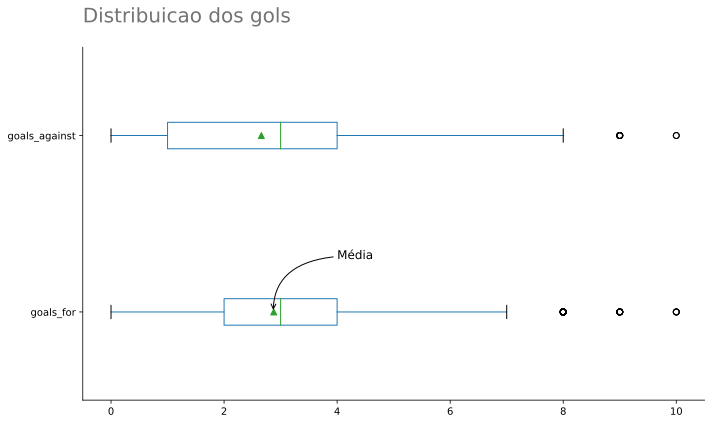

In [20]:
# box plot gols
distrib_goals = nhl_eda[nhl_eda["HoA"]=="home"][['goals_for','goals_against']]

# Gerando grafico
fig, ax = plt.subplots(figsize=(10, 6))
distrib_goals.plot(kind="box", vert=False, showmeans=True, ax=ax)
ax.set_title("Distribuicao dos gols", fontsize=20, pad=25, loc="left", alpha=0.55)

# estilizando imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate("Média",fontsize=12, xy=(2.87,1), xytext=(4,1.3),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=90"))
plt.tight_layout()

O gráfico representa a distribuição dos gols feitos e sofridos dos times mandantes. Não é preciso apresentar um gráfico dos times visitantes porque acabaria sendo redundante uma vez que apenas a ordem mudaria. Os gols sofridos passariam a ser os gols feitos e os gols feitos passariam a ser os gols sofridos. No final a informação passada seria a mesma.

Conclusõe:
* Os times mandantes tendem a fazer de 2 a 4 gols em 50% das vezes com uma média próxima dos 3 gols. Ja os times visitantes apresentam uma distribuição um pouco mais elástica marcando de 1 a 4 gols em 50% das vezes e com uma média superior a 2,5 gols. O maior valor discrepante (*outlier*) registrado em nosso conjunto de dados foi de 10 gols em uma partida.

* De uma forma geral nosso gráfico apresentou bastante equilíbrio entre as equipes e que o fator casa não influenciou tanto no número de gols feitos ou sofridos. Talvez o setor que mais se beneficie seja o defensivo. Logo mais iremos ver essa distribuição de forma individual e ver se temos algum time que tire proveito dessa vantagem.

Nosso conjunto de dados apresentou 6 casos onde tivemos 10 gols em uma única partida como podemos ver abaixo.

In [21]:
nhl_eda[nhl_eda['goals_for'] == 10]

,season,type,date_time,team_name,goals_for,goals_against,HoA,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
game_id,,,,,,,,,,,,,,,,,,
2011030144,20112012,P,2012-04-18,Penguins,10,3,away,REG,Dan Bylsma,36,29,36,9,4,58.0,7,4,W
2017020398,20172018,R,2017-12-03,Canadiens,10,1,home,REG,Claude Julien,34,16,4,2,1,50.8,13,9,W
2016020414,20162017,R,2016-12-11,Canadiens,10,1,home,REG,Michel Therrien,36,11,10,2,1,70.2,10,7,W
2016020158,20162017,R,2016-11-04,Blue Jackets,10,0,home,REG,John Tortorella,40,12,4,5,4,44.4,5,6,W
2017020010,20172018,R,2017-10-06,Blackhawks,10,1,home,REG,Joel Quenneville,44,27,4,6,0,54.9,11,10,W
2010021148,20102011,R,2011-03-30,Blues,10,3,away,REG,Davis Payne,47,23,8,4,2,43.5,9,3,W


Na maioria dos resultados o time mandante foi o responsável pelo feito. A maior liderança foi do time do *Columbus Blue Jackets* contra *Montreal Canadiens* no dia 04/11/2016 da fase regular da temporada de 2016-2017. Você pode acessar o [link](https://www.nhl.com/bluejackets/video/recap-mtl-0-cbj-10/t-277437100/c-46026003) caso queira assistir aos gols

#### Distribuição dos gols por time

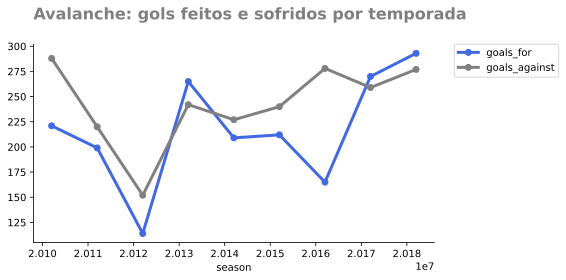

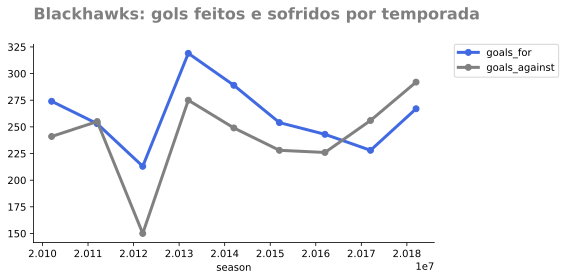

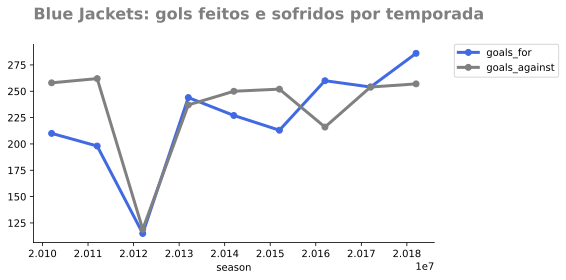

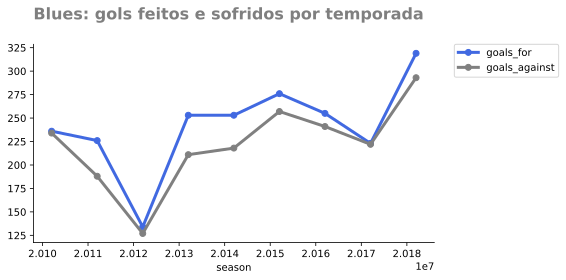

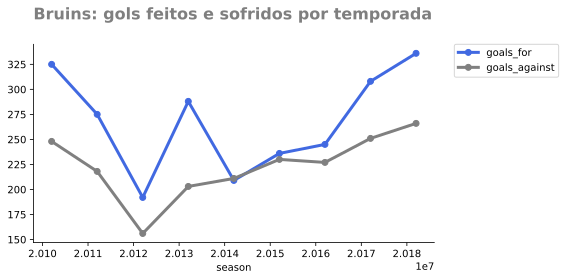

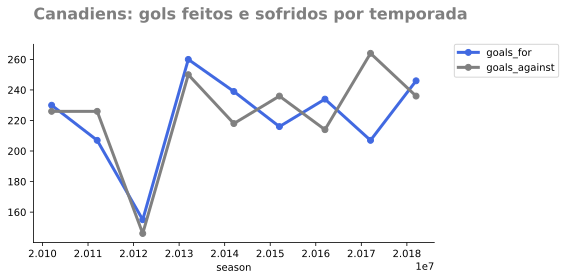

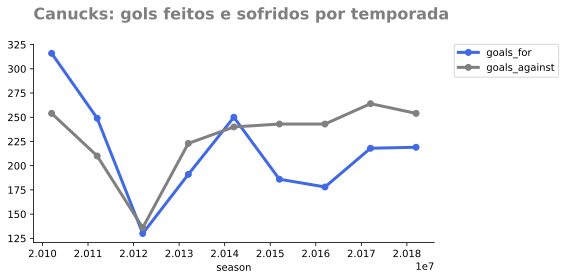

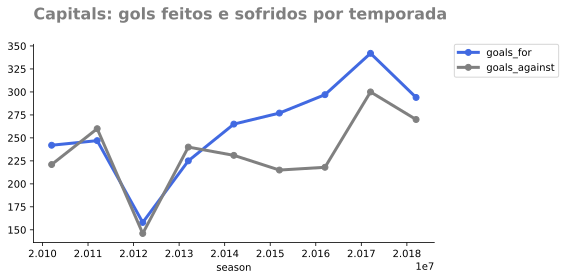

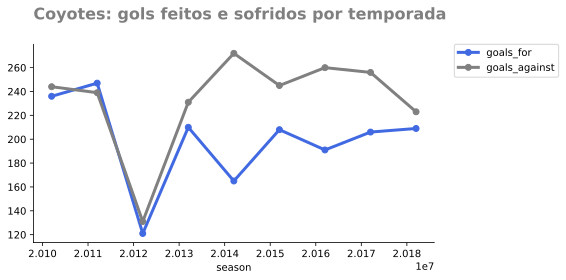

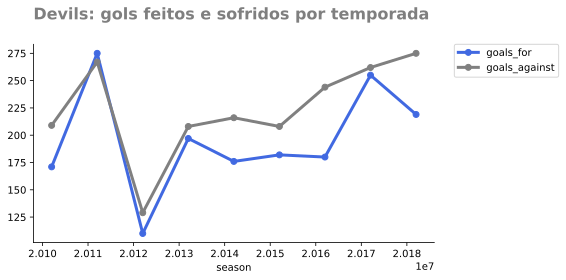

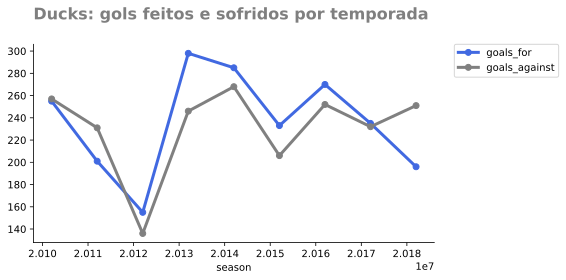

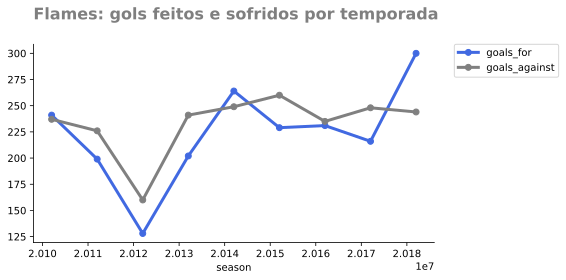

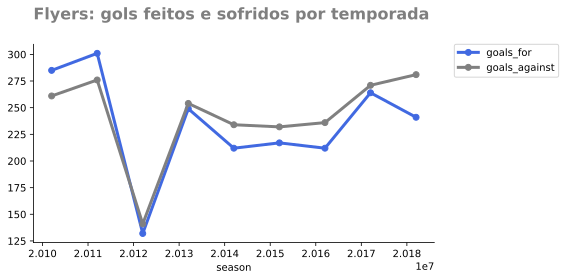

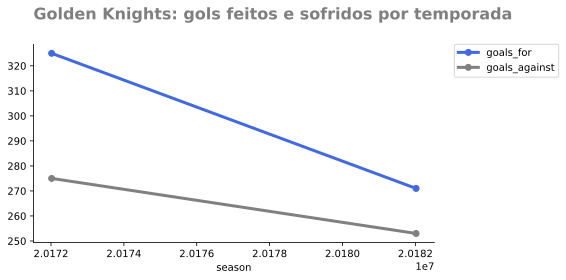

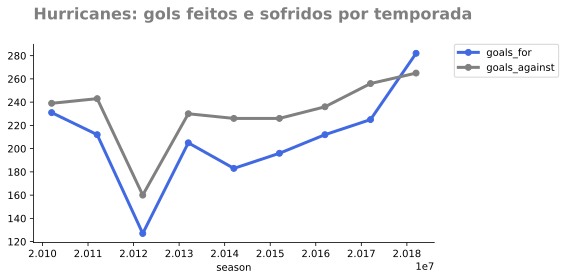

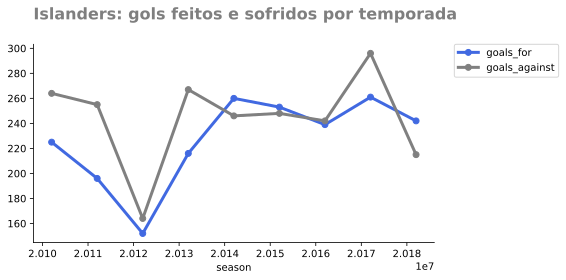

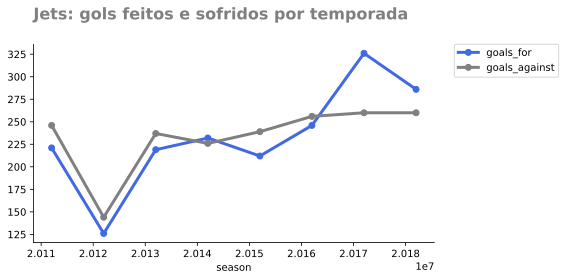

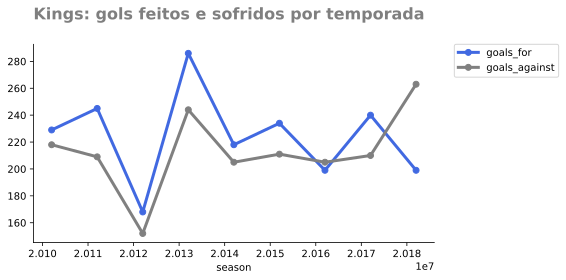

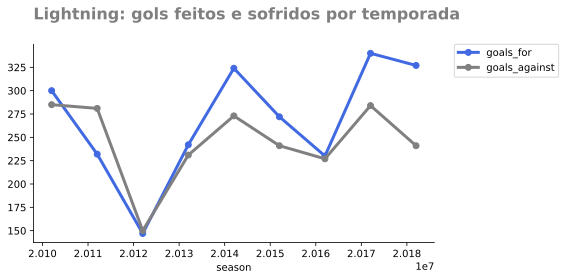

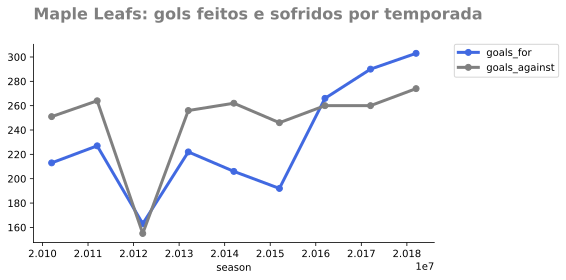

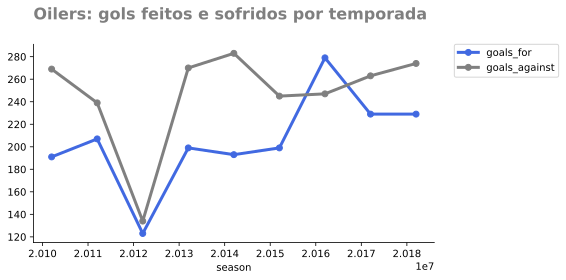

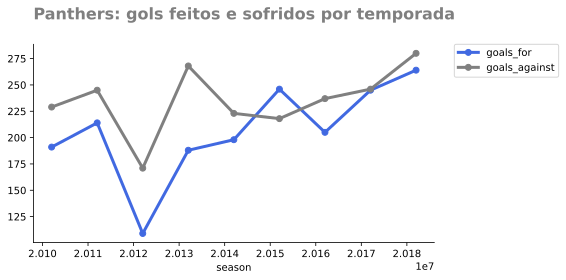

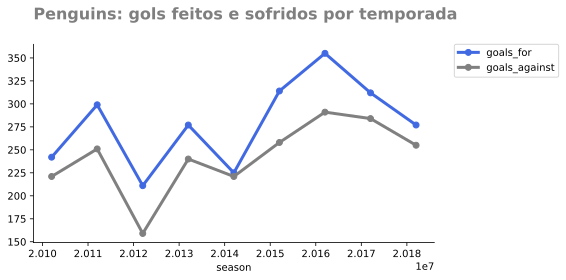

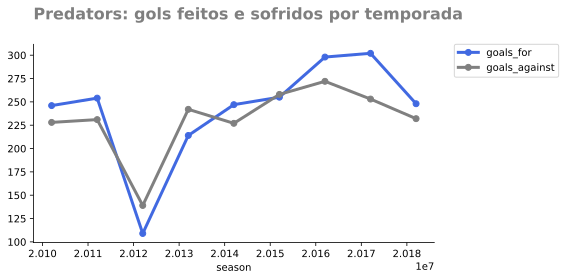

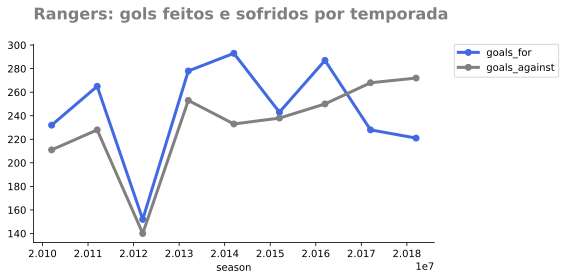

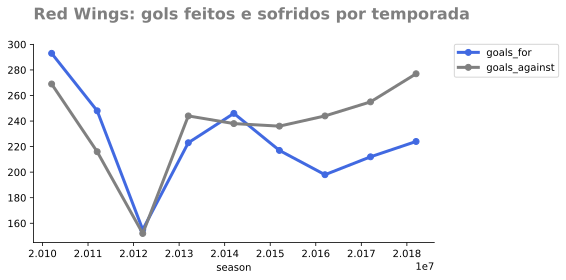

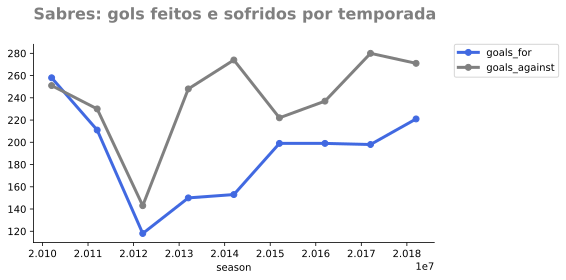

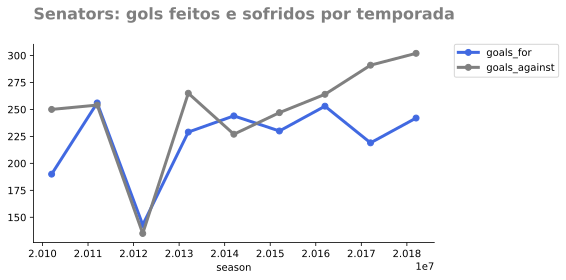

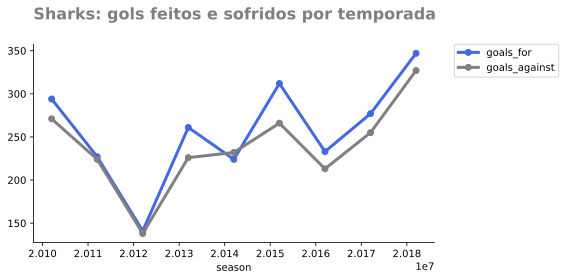

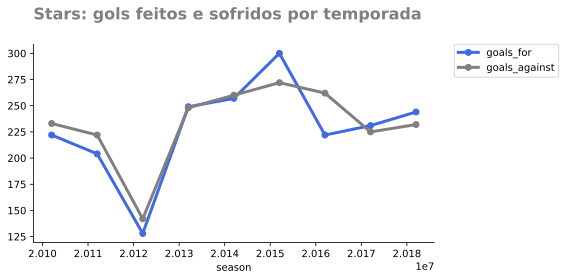

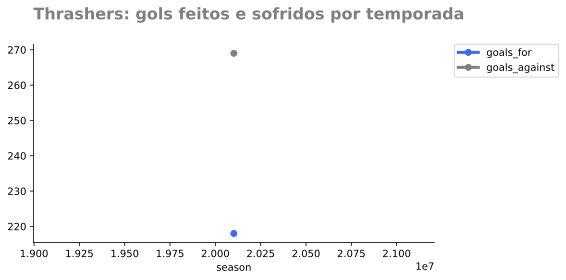

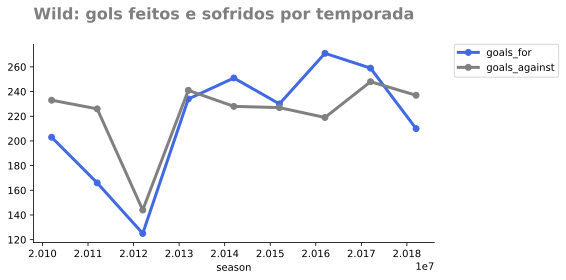

In [45]:
for team in list(nhl_eda["team_name"].sort_values().unique()):
    
    goals_distrib = nhl_eda[(nhl_eda['team_name']== team)].groupby(['season'])[['goals_for','goals_against']].sum()
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    goals_distrib.plot(color=['royalblue','gray'], linewidth=3, ls='-',marker='o', ax=ax)
    ax.set_title(team + ": gols feitos e sofridos por temporada", loc="left", weight="bold", fontsize=16, alpha=0.5, pad=25)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()

### Hits
"Hits" é uma palavra para "choque corporal" no hóquei no gelo. Quando um oponente está na posse do disco ou simplesmente desistiu da posse do disco, você pode usar o ombro ou o quadril para impedir seu progresso, aplicando um "choque corporal" que atinge a área do peito / ombro ou a área do quadril. Essa estatística fornece uma indicação de como fisicamente um indivíduo ou equipe joga contra seus oponentes.

**Analise dos times**:
* Qual o número total de hits por temporada?
* Qual os times com o maior e menor numero de hits?
* Qual a evolucao atraves das temporadas?

**Analises individuais**:
* Qual jogar com maior numero de Hits?
* Qual jogador liderou a liga em hits por temporada?
* Apresentar localizacao dos hits para qualquer jogador selecionado!



### PIM
Tradicionalmente, é chamado de "Penalty In Minutes" (PIM), que representa a duração total das penalidades avaliadas por cada jogador ou equipe. Por exemplo, se um jogador em um jogo recebe uma minor (2 minutos) e uma major (5 minutos), o total desse jogo seria 7 PIMs.

**Analise dos times**:
* Qual o número total de pim por temporada?
* Qual os times com o maior e menor numero de pim?
* Qual a evolucao atraves das temporadas?

**Analises individuais**:
* Qual jogar com maior numero de penalidades?
* Qual jogador liderou a liga em penalidades por temporada?
* Apresentar localizacao das penalidades para qualquer jogador selecionado!

